# FacetGrid

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Basics

In [3]:
sns.set_style("white")

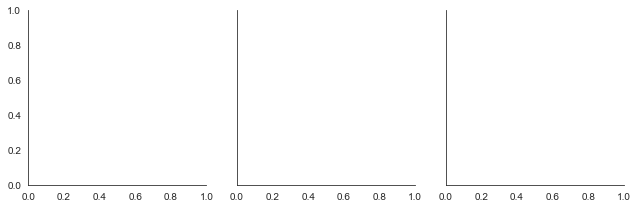

In [4]:
g = sns.FacetGrid(penguins, col="island")

In [5]:
type(g)

seaborn.axisgrid.FacetGrid

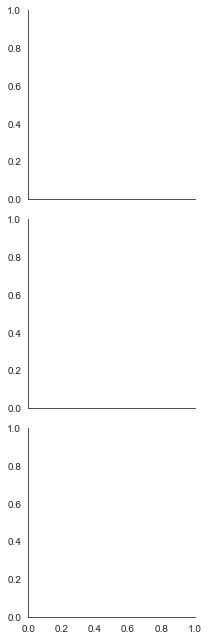

In [6]:
g = sns.FacetGrid(penguins, row="island")

## ``.map()``

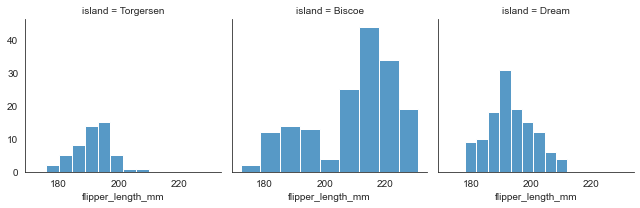

In [7]:
g = sns.FacetGrid(penguins, col="island")
g.map(sns.histplot, "flipper_length_mm")

## ``.map_dataframe()``

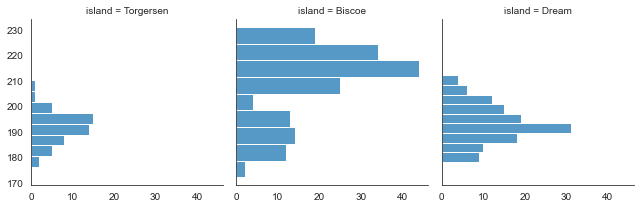

In [8]:
g = sns.FacetGrid(penguins, col="island")
g.map_dataframe(sns.histplot, y="flipper_length_mm")

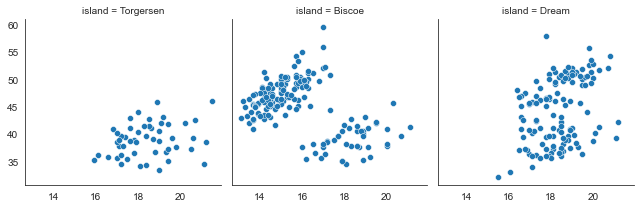

In [9]:
g = sns.FacetGrid(penguins, col="island")
g.map_dataframe(sns.scatterplot , x="bill_depth_mm", y="bill_length_mm")

## Methods and Attributes

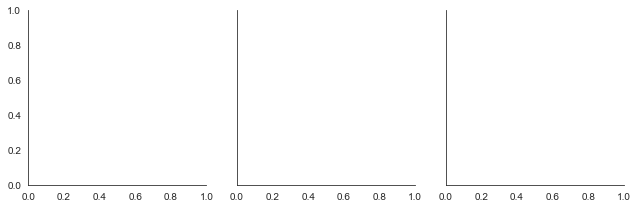

In [10]:
g = sns.FacetGrid(penguins, col="island")

In [11]:
type(g)

seaborn.axisgrid.FacetGrid

### ``.set_axis_labels()``

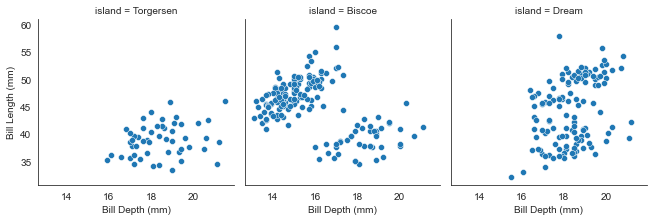

In [12]:
g = sns.FacetGrid(penguins, col="island")
g.map_dataframe(sns.scatterplot , x="bill_depth_mm", y="bill_length_mm")
g.set_axis_labels("Bill Depth (mm)", "Bill Length (mm)")

### ``.set_titles()``

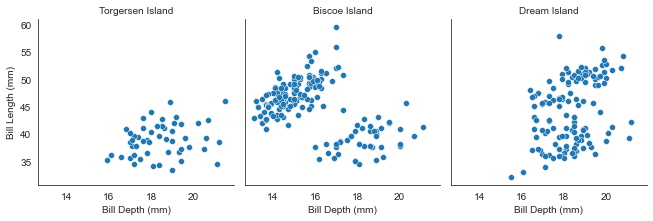

In [13]:
g = sns.FacetGrid(penguins, col="island")
g.map_dataframe(sns.scatterplot , x="bill_depth_mm", y="bill_length_mm")
g.set_axis_labels("Bill Depth (mm)", "Bill Length (mm)")
g.set_titles(col_template="{col_name} Island")

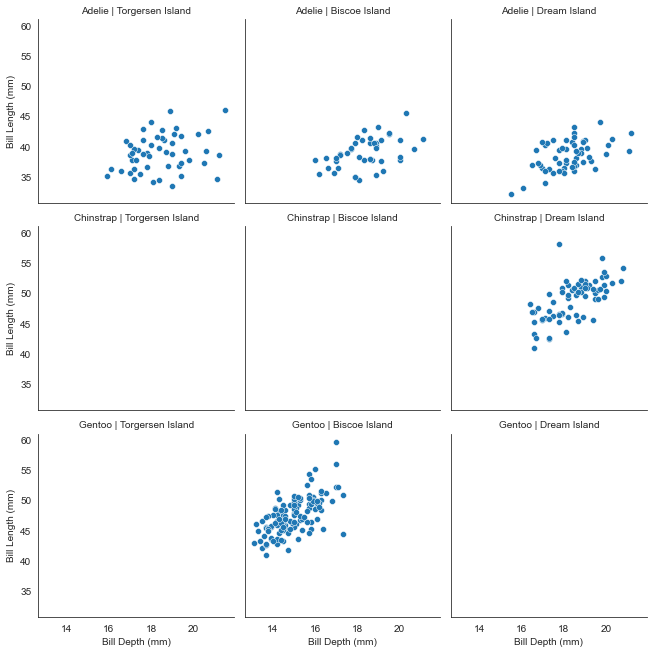

In [14]:
g = sns.FacetGrid(penguins, col="island", row="species")
g.map_dataframe(sns.scatterplot , x="bill_depth_mm", y="bill_length_mm")
g.set_axis_labels("Bill Depth (mm)", "Bill Length (mm)")
g.set_titles(col_template="{col_name} Island", row_template="{row_name}")

### ``sharey``, ``ylim``

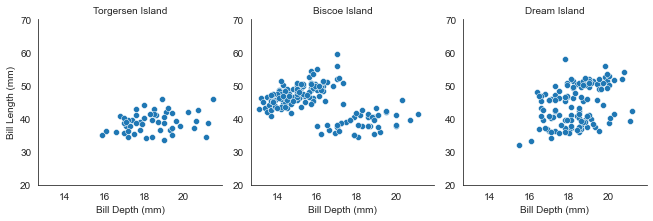

In [15]:
g = sns.FacetGrid(penguins, col="island", sharey=False, ylim=(20, 70))
g.map_dataframe(sns.scatterplot , x="bill_depth_mm", y="bill_length_mm")
g.set_axis_labels("Bill Depth (mm)", "Bill Length (mm)")
g.set_titles(col_template="{col_name} Island")

## Hue and Custom Functions

### ``hue``

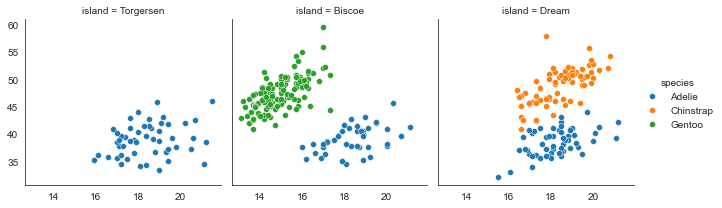

In [16]:
g = sns.FacetGrid(penguins, col="island", hue="species")
g.map_dataframe(sns.scatterplot , x="bill_depth_mm", y="bill_length_mm")
g.add_legend()

### ``palette``

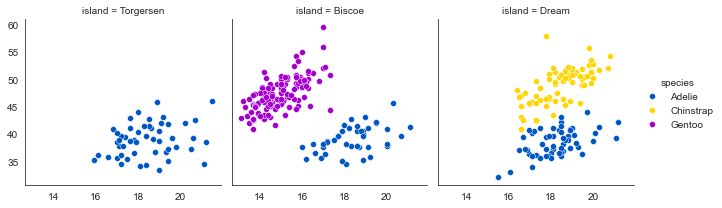

In [17]:
g = sns.FacetGrid(penguins, col="island", hue="species", palette="prism")
g.map_dataframe(sns.scatterplot , x="bill_depth_mm", y="bill_length_mm")
g.add_legend()

## Custom Functions

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def add_mean_line(data, var=None, **kws):
    
    # If no variable provided skip adding mean line
    if not var: return
    
    #Calculate mean for each group
    m = np.mean(data[var])
    
    #Get current axis
    ax = plt.gca()
    
    #add line at group mean
    ax.axvline(m, color='maroon', lw=3, ls='--')
    
    #annotate group mean
    x_pos=0.65
    if m > 5000: x_pos=0.2
    ax.text(x_pos, 0.7, f'mean={m:.0f}', 
            transform=ax.transAxes,   #transforms positions to range from (0,0) to (1,1)
            color='maroon', fontweight='bold', fontsize=12)

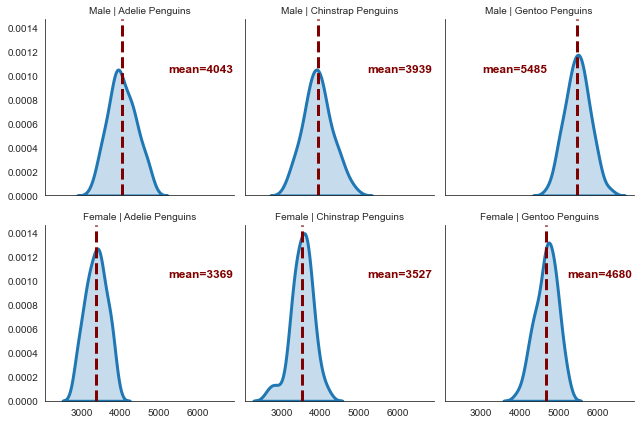

In [19]:
quantity='body_mass_g'

g = sns.FacetGrid(penguins, row='sex', col='species')
g.map_dataframe(sns.kdeplot, x=quantity, lw=3, shade=True)
g.map_dataframe(add_mean_line, var=quantity)
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins');